# Práctica: Análisis Factorial Exploratorio

> Requiere cargar el archivo ["smoke.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/smoke.sav) en el repositorio local. 

Eres un asistente de investigación de un grupo de Psicología de la Salud. En esta etapa preliminar, se te ha asignado evaluar la estructura factorial de una escala elaborada por tu grupo de investigación. 

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss('smoke.sav')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns.values)
scaled_df.dropna(inplace=True)
scaled_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25
0,1.144538,0.845311,-0.623663,1.159459,-1.761410,-1.426881,-0.412549,0.853798,1.223217,-0.559233,...,-0.877338,-0.980196,-0.763370,-0.875545,1.134563,0.561337,-0.025206,-0.608895,-0.366505,0.950168
1,1.144538,0.845311,0.918171,1.159459,0.640513,1.683207,2.090248,0.853798,1.223217,1.304877,...,0.507933,0.070014,0.508913,0.051503,0.360997,0.561337,1.109048,1.248751,1.388859,0.076781
2,1.144538,0.845311,0.918171,0.025206,-0.160128,0.128163,1.255982,0.853798,0.295611,1.304877,...,1.893204,1.120224,1.781197,0.978550,0.360997,1.432377,1.109048,0.319928,1.388859,0.076781
3,-0.244168,-0.104359,-0.623663,0.025206,0.640513,-0.649359,-0.412549,-0.305838,0.295611,1.304877,...,0.507933,0.070014,0.508913,0.978550,-1.186134,0.561337,-0.025206,0.319928,-0.366505,-0.796605
4,-0.244168,0.845311,-0.623663,1.159459,-0.960769,0.905685,0.421717,-0.305838,-0.631995,-0.559233,...,-0.877338,-0.980196,0.508913,-0.875545,1.134563,0.561337,-0.025206,-0.608895,-0.366505,-0.796605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.244168,-0.104359,0.918171,-2.243301,-0.960769,-0.649359,-0.412549,-0.305838,0.295611,-0.559233,...,0.507933,0.070014,0.508913,0.051503,-1.186134,-1.180743,-2.293713,0.319928,-0.366505,-0.796605
87,1.144538,-2.003699,-1.394580,0.025206,0.640513,-1.426881,-0.412549,0.853798,-2.487208,0.372822,...,-0.877338,0.070014,-0.763370,1.905597,-1.186134,0.561337,1.109048,-0.608895,0.511177,-0.796605
88,1.144538,0.845311,0.147254,1.159459,0.640513,0.905685,0.421717,-0.305838,1.223217,2.236931,...,-0.877338,0.070014,0.508913,-0.875545,1.134563,1.432377,1.109048,-0.608895,-0.366505,0.950168
89,1.144538,-0.104359,-1.394580,0.025206,-0.960769,0.128163,-1.246815,-0.305838,0.295611,-0.559233,...,-0.877338,-0.980196,-0.763370,-0.875545,0.360997,1.432377,1.109048,-0.608895,-1.244186,0.076781


## Parte 1: Supuestos de un AF

Evalúa la adecuación de los datos para un análisis factorial empleando las prueba de Bartlett y el índice KMO. ¿Qué puedes concluir?
> Sugerencia: Utiliza las funciones `calculate_bartlett_sphericity` y `calculate_kmo` disponibles en el paquete `factor_analyzer`. 

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Escribe tu respuesta aquí
statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-squared: ", statistic)
print("p-value: ", p_value)

Chi-squared:  898.496653867715
p-value:  1.7083712481171448e-61


In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Escribe tu respuesta aquí
kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("MSA general: ", kmo_total)
print("MSA individual: ", kmo_per_variable)

MSA general:  0.682211127997584
MSA individual:  [0.5709457  0.62590572 0.68323005 0.58301983 0.63961116 0.61281262
 0.85615981 0.58431674 0.56057613 0.68121327 0.84043956 0.62357222
 0.7552532  0.81065538 0.59407629 0.74800841 0.82623233 0.71486755
 0.62704141 0.50944353 0.48382286 0.66084133 0.59019119 0.58605434
 0.42929852]


## Parte 2: Número de factores a extraer

Utiliza el criterio de varianza explicada y el análisis paralelo de Horn para determinar el número de factores a extraer. ¿Qué puedes concluir?
> Sugerencia: Utiliza el método `get_factor_variance` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`, y el método `parallel` de la función `fa` disponible en el paquete `Psych` del lenguaje de programación `R`.

In [15]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=scaled_df.shape[1],rotation=None)
fa.fit(scaled_df)

# Escribe tu respuesta aquí
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

df_var = pd.DataFrame([variance, proportional_variance, cumulative_variance],index=['SS Loadings', 'Proportional variance', 'Cumulative variance'])
df_var.columns += 1
df_var = df_var.add_prefix('F')
df_var

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25
SS Loadings,5.185714,2.686374,2.443131,1.499243,1.284827,1.142558,0.946966,0.665450,0.619686,0.590157,...,0.232395,0.229829,0.204553,0.123396,0.095459,0.060961,0.040316,0.011107,0.007942,0.000000
Proportional variance,0.207429,0.107455,0.097725,0.059970,0.051393,0.045702,0.037879,0.026618,0.024787,0.023606,...,0.009296,0.009193,0.008182,0.004936,0.003818,0.002438,0.001613,0.000444,0.000318,0.000000
Cumulative variance,0.207429,0.314884,0.412609,0.472579,0.523972,0.569674,0.607553,0.634171,0.658958,0.682564,...,0.768859,0.778052,0.786234,0.791170,0.794988,0.797427,0.799039,0.799484,0.799801,0.799801


In [17]:
%load_ext rpy2.ipython

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


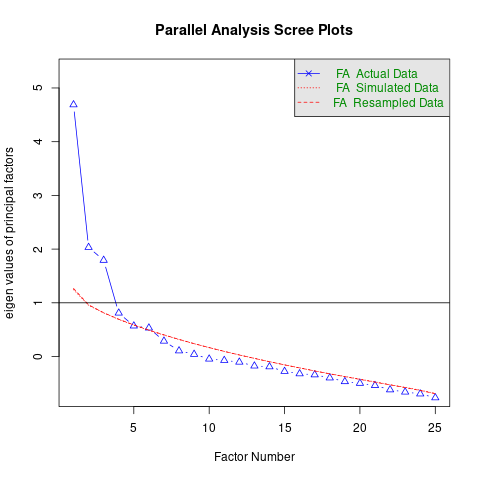

In [18]:
%%R
library(foreign)
library(psych)

# Cargamos los datos en el entorno R
dat <- read.spss("smoke.sav", to.data.frame = TRUE)

# Escribe tu respuesta aquí
parallel <- fa.parallel(dat, n.iter=1000, fa="fa")

## Parte 3: Extracción y rotación de factores

Extrae el número de factores que determinaste en el paso anterior empleando una rotación "Varimax".
> Sugerencia: Utiliza la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`. 

In [20]:
fa = FactorAnalyzer(n_factors=4,rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
s1,-0.067966,-0.019830,0.852959,0.025666
s2,0.061773,0.486379,0.102704,-0.066748
s3,0.327831,0.294761,-0.222208,0.126667
s4,-0.157958,0.473097,-0.036717,0.224637
s5,0.202945,0.372874,0.019217,0.524771
s6,0.098022,0.372651,-0.135840,0.675942
s7,0.509262,0.536921,0.083318,0.261410
s8,0.034849,0.318891,0.373752,-0.043161
s9,0.287326,0.185251,0.298829,-0.044932
s10,0.493840,0.301266,0.376330,0.055160


## Parte 4: Interpretación de factores

1. Examina la signifcancia estadística de las cargas factoriales. Debido al tamaño de muestra, utiliza un punto de corte de .6. ¿Qué observas?
>Sugerencia: Utiliza el método `diagram` de la función `fa` disponible en el paquete `Psych` del lenguaje de programación `R`. 

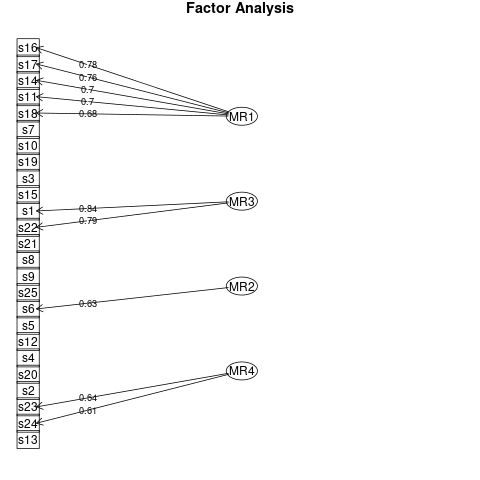

In [32]:
%%R
# Extrae los factores
fit <- fa(dat, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.6)

2. Evalúa la razón de cargas al cuadrado. ¿Qué observas?

In [27]:
def cross_loading_eval(ratio):
    if ratio < 1.5:
        return 'Problematic'
    elif ratio < 2:
        return 'Potential'
    else:
        return 'Ignorable'

# Escribe tu respuesta aquí
squared_loadings = pd.DataFrame(fa.loadings_**2, index=scaled_df.columns)
squared_loadings.columns += 1 
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings['Ratio'] = squared_loadings.apply(lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1)
squared_loadings['Classification'] = squared_loadings['Ratio'].apply(cross_loading_eval)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,F4,Ratio,Classification
s1,0.004619,0.000393,0.727540,0.000659,157.498021,Ignorable
s2,0.003816,0.236564,0.010548,0.004455,22.427272,Ignorable
s3,0.107473,0.086884,0.049376,0.016045,1.236979,Problematic
s4,0.024951,0.223821,0.001348,0.050462,4.435457,Ignorable
s5,0.041187,0.139035,0.000369,0.275384,1.980687,Potential
s6,0.009608,0.138869,0.018453,0.456898,3.290137,Ignorable
s7,0.259348,0.288284,0.006942,0.068335,1.111570,Problematic
s8,0.001214,0.101692,0.139690,0.001863,1.373665,Problematic
s9,0.082556,0.034318,0.089299,0.002019,1.081670,Problematic
s10,0.243878,0.090761,0.141624,0.003043,1.722004,Potential


3. Evalúa las comunalidades. ¿Qué observas?
> Sugerencia: Utiliza el método `get_communalities` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`.

In [29]:
communalities = pd.DataFrame(fa.get_communalities(),index=scaled_df.columns.values, columns=["Communalities"])
communalities

,Communalities
s1,0.733211
s2,0.255384
s3,0.259778
s4,0.300581
s5,0.455975
s6,0.623828
s7,0.622909
s8,0.244459
s9,0.208192
s10,0.479306


4. En función a tus observaciones, re-especifica el modelo. 
> Sugerencia: Dado el tamaño de muestra pequeño, considera eliminar las variables con comunalidades o razones de cargas al cuadrado inaceptables. Esto para aumentar la cantidad de casos por cada variable.

In [80]:
problematic_vars = ['s3','s7','s8','s9','s2','s4','s5','s10','s12','s13','s15','s19','s20','s21','s23','s24','s25']
new_df = scaled_df.drop(columns=problematic_vars)
new_df

,s1,s6,s11,s14,s16,s17,s18,s22
0,1.144538,-1.426881,-0.949639,-0.972866,-0.877338,-0.980196,-0.763370,-0.025206
1,1.144538,1.683207,0.365246,0.010931,0.507933,0.070014,0.508913,1.109048
2,1.144538,0.128163,1.680131,0.994729,1.893204,1.120224,1.781197,1.109048
3,-0.244168,-0.649359,2.995015,1.978526,0.507933,0.070014,0.508913,-0.025206
4,-0.244168,0.905685,0.365246,-0.972866,-0.877338,-0.980196,0.508913,-0.025206
...,...,...,...,...,...,...,...,...
86,-0.244168,-0.649359,0.365246,0.010931,0.507933,0.070014,0.508913,-2.293713
87,1.144538,-1.426881,-0.949639,0.010931,-0.877338,0.070014,-0.763370,1.109048
88,1.144538,0.905685,1.680131,1.978526,-0.877338,0.070014,0.508913,1.109048
89,1.144538,0.128163,-0.949639,-0.972866,-0.877338,-0.980196,-0.763370,1.109048


Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


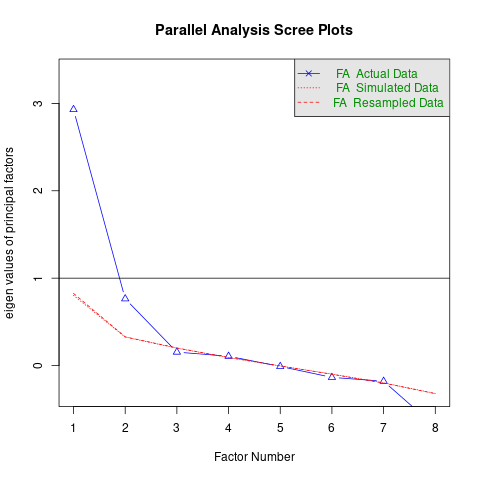

In [79]:
%%R
# Cargamos los datos en el entorno R
dat <- read.spss("smoke.sav", to.data.frame = TRUE)
dat <- subset (dat, select = -c(s3,s7,s8,s9,s2,s4,s5,s10,s12,s13,s15,s19,s20,s21,s23,s24,s25))


# Parallel Analysis with Psych package.
parallel <- fa.parallel(dat, n.iter=1000, fa="fa")

In [81]:
re_fa = FactorAnalyzer(n_factors=2,rotation="varimax")
re_fa.fit(new_df)

squared_loadings = pd.DataFrame(re_fa.loadings_**2, index=new_df.columns)
squared_loadings.columns += 1 
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings['Ratio'] = squared_loadings.apply(lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1)
squared_loadings['Classification'] = squared_loadings['Ratio'].apply(cross_loading_eval)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,Ratio,Classification
s1,0.003605,0.907827,251.840412,Ignorable
s6,0.049298,0.006482,7.605804,Ignorable
s11,0.582241,0.009874,58.967498,Ignorable
s14,0.464614,0.018291,25.400857,Ignorable
s16,0.647959,0.002733,237.097022,Ignorable
s17,0.593620,0.002401,247.203195,Ignorable
s18,0.697690,0.001047,666.114139,Ignorable
s22,0.002804,0.510173,181.915075,Ignorable


In [82]:
communalities = pd.DataFrame(re_fa.get_communalities(),index=new_df.columns.values, columns=['Communalities'])
communalities

,Communalities
s1,0.911432
s6,0.055780
s11,0.592115
s14,0.482905
s16,0.650692
s17,0.596021
s18,0.698738
s22,0.512977


5. Define una estructura factorial sugerida creando una variable `factor_index`. Describe la estructura factorial propuesta, considerando sus fortalezas y debilidades.

In [83]:
loadings = pd.DataFrame(re_fa.loadings_, index=new_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix('F')
loadings

Cargas Factoriales:


,F1,F2
s1,-0.060040,0.952800
s6,0.222031,-0.080508
s11,0.763047,0.099368
s14,0.681626,0.135245
s16,0.804959,-0.052277
s17,0.770467,-0.049004
s18,0.835279,0.032364
s22,0.052957,0.714264


In [84]:
factor_index = {'F1': ['s6','s11','s14','s16','s17','s18'], 
                'F2': ['s1','s22']}

factor_index

{'F1': ['s6', 's11', 's14', 's16', 's17', 's18'], 'F2': ['s1', 's22']}